In [876]:
import json
import pandas as pd
import numpy as np

In [877]:
with open(r"C:/Users/james/Desktop/Diss_Code_for_AUC/Yolo_landmark_model/auc_train_landmarks_pose_70_SW_50.json") as jsonfile:
    full_coordintate_dict = json.load(jsonfile)


In [878]:
cls_count = []
for cls in full_coordintate_dict.keys():
    count = len(full_coordintate_dict[cls])
    cls_count.append(count)
cls_count

[1723, 895, 647, 527, 607, 641, 405, 318, 412, 1007]

In [879]:
x_values = []
y_values = []
sample = min(cls_count)
conf = []
for cls, class_data in full_coordintate_dict.items():
    sample_count = 0
    for Coord_type, points in class_data.items():
        x_coord_points = list(points["X_coord"].values())
        y_coord_points = list(points["Y_coord"].values())
        conf_points = list(points["Z_coord/conf"].values())
        x_coord_points.extend(y_coord_points)
        x_values.append(x_coord_points)
        y_values.append(cls)
        conf.append(conf_points)
        sample_count += 1
        if sample_count >= sample:
            break
X = np.array(x_values)
y = np.array(y_values)
conf = np.array(conf)
X = X.reshape(X.shape[0], -1)
X.shape

(3180, 50)

In [880]:
X.shape

(3180, 50)

Create Mean STD and Var calculations

In [881]:
ave_conf = np.mean(conf, axis=0)
std_conf = np.std(conf, axis=0)
var_conf = np.var(conf, axis=0)

In [882]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

y = to_categorical(y, num_classes=10)

In [883]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = (1/3), random_state=42)

In [884]:
X_train.shape

(2226, 50)

In [885]:
X_test.shape

(318, 50)

In [886]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras import optimizers, regularizers
from keras.initializers import Constant

In [887]:
model = Sequential()

In [888]:
l2_regularizer = regularizers.l2(0.001)

model.add(Input(shape=(50,)))
model.add(Dense(50, activation = "relu", activity_regularizer= l2_regularizer)) #, bias_initializer = Constant(ave_conf)
model.add(Dense(100, activation = "relu", activity_regularizer= l2_regularizer))# kernel_regularizer =  l2_regularizer),
model.add(Dense(300, activation = "relu", activity_regularizer= l2_regularizer))# kernel_regularizer =  l2_regularizer),
model.add(Dropout(0.3))
model.add(Dense(600, activation = "relu", activity_regularizer= l2_regularizer))# kernel_regularizer =  l2_regularizer),
model.add(Dense(1200, activation = "relu", activity_regularizer= l2_regularizer))# kernel_regularizer =  l2_regularizer),
model.add(Dropout(0.5))
model.add(Dense(600, activation = "relu", activity_regularizer= l2_regularizer))# kernel_regularizer =  l2_regularizer),`
model.add(Dense(10, activation = "softmax"))
# optimizer = "adam"
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()



Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_277 (Dense)           (None, 50)                2550      
                                                                 
 dense_278 (Dense)           (None, 100)               5100      
                                                                 
 dense_279 (Dense)           (None, 300)               30300     
                                                                 
 dropout_45 (Dropout)        (None, 300)               0         
                                                                 
 dense_280 (Dense)           (None, 600)               180600    
                                                                 
 dense_281 (Dense)           (None, 1200)              721200    
                                                                 
 dropout_46 (Dropout)        (None, 1200)            

In [889]:
EPOCH = 80
fitted = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCH, batch_size=32)


Epoch 1/80


70/70 [==============================] - 1s 13ms/step - loss: 2.3132 - accuracy: 0.1240 - val_loss: 2.2888 - val_accuracy: 0.2028
Epoch 2/80
70/70 [==============================] - 1s 12ms/step - loss: 2.2159 - accuracy: 0.2525 - val_loss: 2.0147 - val_accuracy: 0.2594
Epoch 3/80
70/70 [==============================] - 1s 12ms/step - loss: 1.7495 - accuracy: 0.3841 - val_loss: 1.4957 - val_accuracy: 0.4811
Epoch 4/80
70/70 [==============================] - 1s 13ms/step - loss: 1.4480 - accuracy: 0.4834 - val_loss: 1.3392 - val_accuracy: 0.5472
Epoch 5/80
70/70 [==============================] - 1s 12ms/step - loss: 1.3378 - accuracy: 0.5175 - val_loss: 1.2290 - val_accuracy: 0.5881
Epoch 6/80
70/70 [==============================] - 1s 13ms/step - loss: 1.2587 - accuracy: 0.5597 - val_loss: 1.1506 - val_accuracy: 0.6164
Epoch 7/80
70/70 [==============================] - 1s 13ms/step - loss: 1.1930 - accuracy: 0.5957 - val_loss: 1.0879 - val_accuracy: 0.6447
Epoch 8/80
70/70 [======

In [890]:
model.save("Auc_MPL_Landmarks_epochs_140.h5")

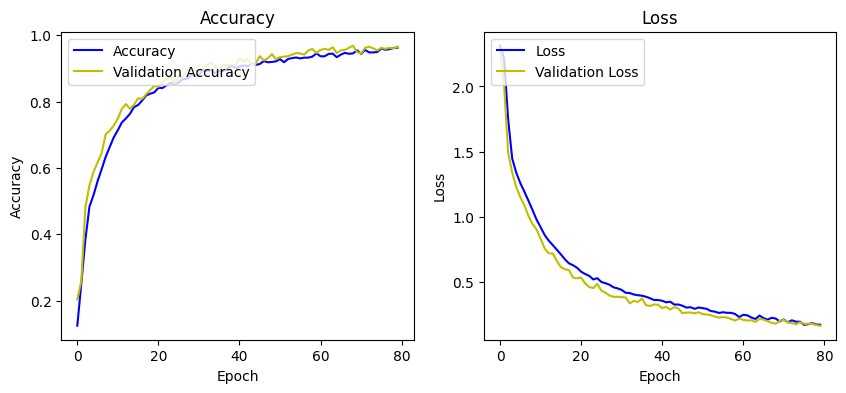

In [891]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))
ax = plt.subplot(1,2,1)
plt.plot(fitted.history["accuracy"], color="b", label="Accuracy")
plt.plot(fitted.history["val_accuracy"], color="y", label="Validation Accuracy")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc = "upper left")
ax = plt.subplot(1,2,2)
plt.plot(fitted.history["loss"], color="b", label="Loss")
plt.plot(fitted.history["val_loss"], color="y", label="Validation Loss")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc = "upper left")
plt.show()

In [892]:
from sklearn.metrics import accuracy_score

In [893]:
y_pred = model.predict(X_test)
max_index_pred = []
max_index_test = []
for i, value in enumerate(y_pred):
    max_index_pred.append(np.argmax(y_pred[i]))
for i, value in enumerate(y_test):
    max_index_test.append(np.argmax(y_test[i]))

accuracy = accuracy_score(max_index_test, max_index_pred)
print("Accuracy:", accuracy)


10/10 [==============================] - 0s 2ms/step
Accuracy: 0.9339622641509434


In [894]:
meta = {'c0': "Focussed",
         'c1' : "Text-Phone Right",
           'c2': "Talk-Phone Right", 
           'c3': "Text-Phone Left", 
           'c4': "Talk-Phone Left", 
           'c5': "Radio Adjust", 
           'c6': "Drinking", 
           'c7': "Back Seat Reach", 
           'c8': "Misc Manual", 
           'c9': "Visual"
}

In [895]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, confusion_matrix
f1 = f1_score(max_index_test, max_index_pred, average="weighted")
precision = precision_score(max_index_test, max_index_pred, average="weighted")
recall = recall_score(max_index_test, max_index_pred, average="weighted")
print("f1:        " + str(f1))
print("Precision: " + str(precision))
print("recall:    " + str(recall))

f1:        0.9337113222638768
Precision: 0.9366235872603799
recall:    0.9339622641509434


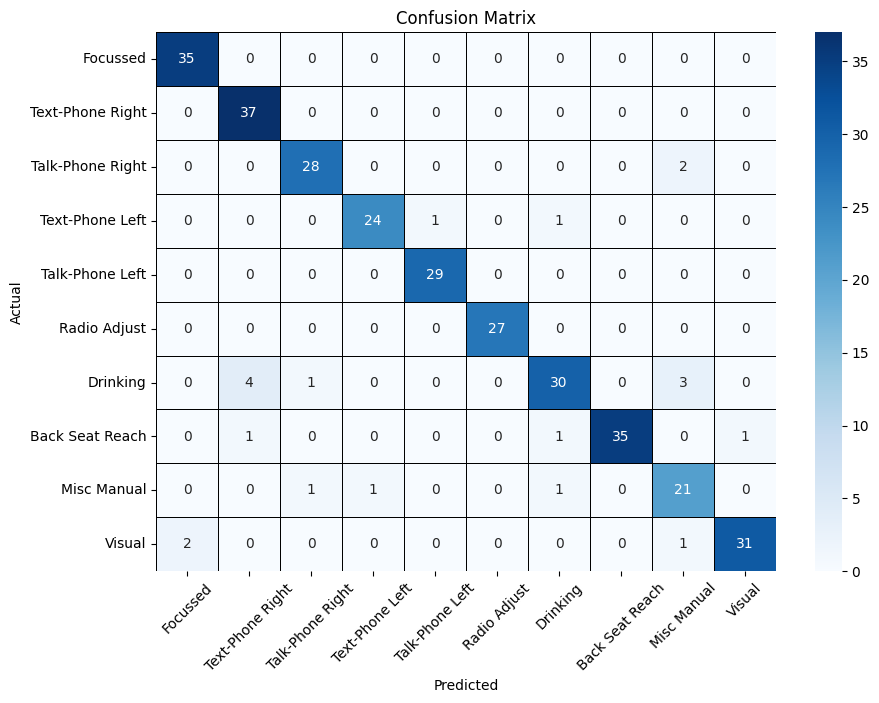

In [896]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5, 9.5]
confusion = confusion_matrix(max_index_test, max_index_pred)
plt.figure(figsize=(10,7))
sns.heatmap(confusion, cmap="Blues", annot=True, fmt = ".5g", cbar=True, linewidths = 0.5,linecolor="black")
plt.xticks(ticks=ticks, labels=list(meta.values()), rotation=45)
plt.yticks(ticks=ticks, labels=list(meta.values()), rotation=-0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show() 

Distraction 0 vs Non Distraction 1

In [897]:
def change_from_10_cls_2_cls(y_arr):
    new_list = []
    for i in y_arr:
        if i == 0:
            new_list.append(0)
        else:
            new_list.append(1)
    return new_list

In [898]:
y_adj_pred = change_from_10_cls_2_cls(max_index_pred)
y_adj_test = change_from_10_cls_2_cls(max_index_test)
accuracy = accuracy_score(y_adj_pred, y_adj_test)
print("Accuracy:", accuracy)

Accuracy: 0.9937106918238994
